In [1]:
import os, shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/kaggle_original_dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
len(os.listdir('/tmp/kaggle_original_dataset/'))

10002

In [5]:
original_dataset_dir = '/tmp/kaggle_original_dataset/'

base_dir = '/tmp/cats_and_dogs_small_dataset/'

os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')

os.mkdir(train_dir)

In [7]:
validation_dir = os.path.join(base_dir, 'validation')

os.mkdir(validation_dir)

In [8]:
test_dir = os.path.join(base_dir, 'test')

os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')

os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')

os.mkdir(train_dogs_dir)

In [10]:
validation_cats_dir = os.path.join(validation_dir, 'cats')

os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')

os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')

os.mkdir(test_dogs_dir)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [15]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [16]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [17]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [18]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [19]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [22]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size= 20, 
    class_mode= 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size= 20, 
    class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_data = validation_generator, 
                              validation_steps = 50)

Epoch 1/30


<ipython-input-25-9f7f935b890a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 21s 117ms/step - loss: 0.6920 - acc: 0.5215 - val_loss: 0.6717 - val_acc: 0.6300
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6621 - acc: 0.6080 - val_loss: 0.6421 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6152 - acc: 0.6515 - val_loss: 0.6868 - val_acc: 0.5780
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5703 - acc: 0.7030 - val_loss: 0.6436 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5352 - acc: 0.7290 - val_loss: 0.5895 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 9s 92ms/step - loss: 0.5105 - acc: 0.7445 - val_loss: 0.5710 - val_acc: 0.7060
Epoch 7/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4738 - acc: 0.7705 - val_loss: 0.5817 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 9s 93ms/step - loss: 0.4

In [26]:
model.save('cats_and_dogs_small_1.h5')

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

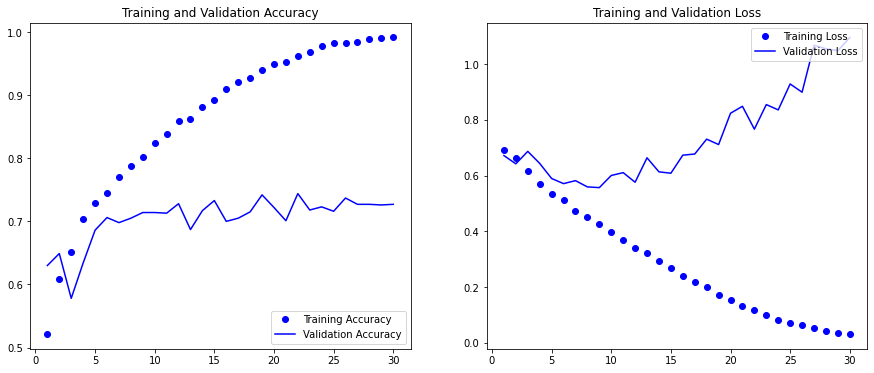

In [28]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

## Using Data Augmentation

In [29]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range= 0.2, 
    zoom_range= 0.2, 
    horizontal_flip = True, 
    fill_mode = 'nearest')

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


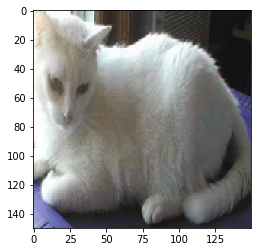

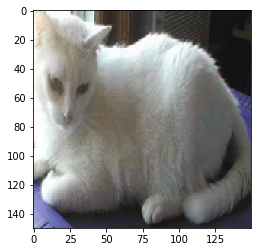

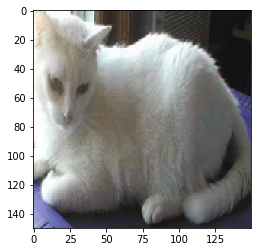

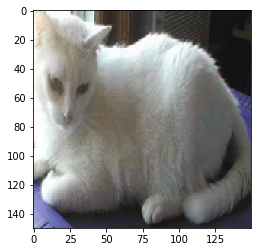

In [30]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# define and initialize the ImageDataGenerator object
datagen = ImageDataGenerator(...)

i = 0

for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4==0:
        break
        
plt.show()


In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [41]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range= 0.2, 
    zoom_range= 0.2, 
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size= 32, 
    class_mode= 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size= 32, 
    class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### The model could not be fit with *steps_per_epoch* and *validation_steps* 
### Because low memory/RAM
### To run with *steps_per_epoch* and *validation_steps*, batch_size can be reduced to a lower value. 

In [42]:
history = model.fit(
    train_generator, #steps_per_epoch = 100
    epochs = 100, 
    validation_data = validation_generator, #validation_steps = 50, 
    )

Epoch 1/100
63/63 [==============================] - 19s 296ms/step - loss: 0.6775 - acc: 0.5780 - val_loss: 0.6918 - val_acc: 0.5120
Epoch 2/100
63/63 [==============================] - 17s 274ms/step - loss: 0.6691 - acc: 0.5930 - val_loss: 0.6543 - val_acc: 0.6020
Epoch 3/100
63/63 [==============================] - 17s 270ms/step - loss: 0.6635 - acc: 0.6000 - val_loss: 0.6442 - val_acc: 0.6320
Epoch 4/100
63/63 [==============================] - 18s 287ms/step - loss: 0.6549 - acc: 0.6220 - val_loss: 0.6604 - val_acc: 0.5800
Epoch 5/100
63/63 [==============================] - 17s 272ms/step - loss: 0.6431 - acc: 0.6385 - val_loss: 0.6081 - val_acc: 0.6490
Epoch 6/100
63/63 [==============================] - 18s 292ms/step - loss: 0.6268 - acc: 0.6455 - val_loss: 0.5920 - val_acc: 0.6750
Epoch 7/100
63/63 [==============================] - 19s 309ms/step - loss: 0.6295 - acc: 0.6410 - val_loss: 0.6506 - val_acc: 0.5950
Epoch 8/100
63/63 [==============================] - 17s 270ms

In [43]:
model.save('cats_and_dogs_small_2.h5')

In [44]:
import matplotlib.pyplot as plt

accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = 100
epochs_range = range(epochs) #epochs = range(1, len(acc) + 1)

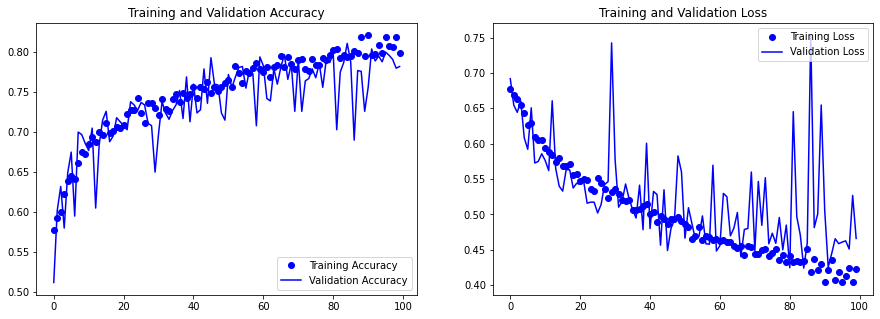

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo', label='Training Loss')
plt.plot(epochs_range, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()

In [77]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')


test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test accuracy:', test_acc*100)
print('test loss:', test_loss*100)

Found 1000 images belonging to 2 classes.


<ipython-input-77-ef689a4cc832>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)


test accuracy: 78.79999876022339
test loss: 46.5769499540329


In [48]:
from tensorflow.keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     